<b>¡Hola Maximiliano!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
¡Excelente inicio! Importar todas las librerías necesarias al principio del notebook es una buena práctica de programación (PEP 8). Esto facilita la lectura y asegura que el entorno esté listo desde el primer momento.
</div>

In [2]:
df_clients = pd.read_csv("telecom_clients.csv")
df_calls = pd.read_csv("telecom_dataset_new.csv")

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Has cargado correctamente ambos datasets. Es fundamental separar los datos de llamadas y de clientes para mantener la estructura relacional antes de unirlos.
</div>

In [3]:
df_calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [4]:
df_clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Usar <code>.info()</code> es el paso correcto para entender la estructura de los datos, los tipos de variables y detectar valores nulos de un vistazo. Muy bien hecho.
</div>

In [6]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [7]:
print(df_calls.duplicated().sum())

4900


In [8]:
print(df_clients.duplicated().sum())

0


In [9]:
#Eliminar duplicados en el DataFrame de llamadas 
df_calls_clean = df_calls.drop_duplicates().copy()
#Eliminar nulos en columna operator_id 
df_calls_clean = df_calls_clean.dropna(subset=['operator_id'])

<div class="alert alert-block alert-success">
<b>Decisión correcta</b> <a class="tocSkip"></a><br>
Eliminar las filas donde <code>operator_id</code> es nulo es crucial. Dado que nuestro objetivo es evaluar a los operadores, las filas sin esta identificación no aportan valor al análisis y podrían generar ruido.
</div>

In [10]:
#Conversión de tipos 
df_calls_clean['date'] = pd.to_datetime(df_calls_clean['date']).dt.date
df_clients['date_start'] = pd.to_datetime(df_clients['date_start'])
df_calls_clean['operator_id'] = df_calls_clean['operator_id'].astype(int)

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La conversión de tipos es impecable. Convertir las fechas a <code>datetime</code> y los IDs a enteros no solo ahorra memoria, sino que habilita operaciones temporales y de cruce de datos correctas.
</div>

In [11]:
df_calls_clean.info()
print()
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41546 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              41546 non-null  int64 
 1   date                 41546 non-null  object
 2   direction            41546 non-null  object
 3   internal             41491 non-null  object
 4   operator_id          41546 non-null  int64 
 5   is_missed_call       41546 non-null  bool  
 6   calls_count          41546 non-null  int64 
 7   call_duration        41546 non-null  int64 
 8   total_call_duration  41546 non-null  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 2.9+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object  

In [12]:
#Calcular tiempo de espera 
df_calls_clean['waiting_time'] = df_calls_clean['total_call_duration'] - df_calls_clean['call_duration']

<div class="alert alert-block alert-success">
<b>Concepto clave: Feature Engineering</b> <a class="tocSkip"></a><br>
Has creado una nueva característica (<code>waiting_time</code>) derivada de las existentes. Este cálculo es esencial para definir una de las métricas de ineficacia. ¡Bien visto!
</div>

In [13]:
# EDA: Análisis de las métricas de ineficacia


incoming_calls = df_calls_clean[df_calls_clean['direction'] == 'in'].copy()


incoming_calls['missed_count_val'] = incoming_calls.apply(
    lambda x: x['calls_count'] if x['is_missed_call'] else 0, axis=1
)

# Agrupamos por operador
operator_incoming_stats = incoming_calls.groupby('operator_id').agg(
    total_incoming=('calls_count', 'sum'),
    total_missed=('missed_count_val', 'sum')
)

# Calculamos la tasa
operator_incoming_stats['missed_rate'] = operator_incoming_stats['total_missed'] / operator_incoming_stats['total_incoming']

# Calculamos tiempo de espera promedio (Ponderado)
operator_waiting_stats = incoming_calls.groupby('operator_id')['waiting_time'].sum() / incoming_calls.groupby('operator_id')['calls_count'].sum()
operator_incoming_stats['avg_waiting_time'] = operator_waiting_stats

# Verificamos
print(operator_incoming_stats.head())

             total_incoming  total_missed  missed_rate  avg_waiting_time
operator_id                                                             
879896                   58             0          0.0          9.896552
879898                  104             0          0.0         16.153846
880020                    7             0          0.0          7.714286
880022                    8             0          0.0         14.000000
880026                   24             0          0.0          5.958333


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La agregación por operador para obtener métricas promedio es sólida. Has manejado bien la lógica para contar las llamadas perdidas y ponderar el tiempo de espera.<br><br>

<b>Tip educativo:</b> Para la columna <code>missed_count_val</code>, usaste <code>apply</code>, lo cual es correcto. Sin embargo, para datasets muy grandes, <code>np.where</code> de NumPy suele ser mucho más rápido. Sería algo así:
<code>incoming_calls['missed_count_val'] = np.where(incoming_calls['is_missed_call'], incoming_calls['calls_count'], 0)</code>
</div>

In [14]:
# Llamadas Salientes (Pocas)
outgoing_calls = df_calls_clean[df_calls_clean['direction'] == 'out']
operator_outgoing_stats = outgoing_calls.groupby('operator_id')['calls_count'].sum().rename('total_outgoing')

# Unir todo en un perfil de operador
operator_profile = operator_incoming_stats.join(operator_outgoing_stats, how='outer').fillna(0)

Text(0.5, 0, 'Tasa de Perdidas (Missed / Total Incoming)')

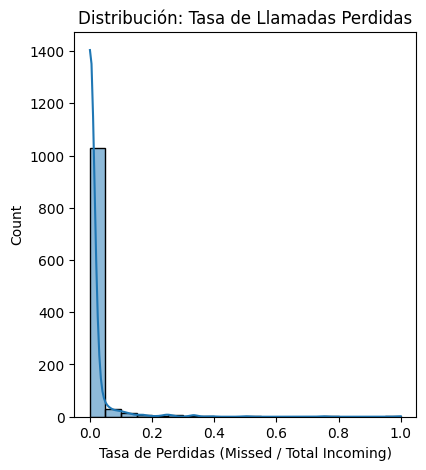

In [15]:
# --- VISUALIZACIÓN ---
plt.figure(figsize=(15, 5))

# Plot 1: Distribución de Tasa de Llamadas Perdidas
plt.subplot(1, 3, 1)
sns.histplot(operator_profile['missed_rate'], bins=20, kde=True)
plt.title('Distribución: Tasa de Llamadas Perdidas')
plt.xlabel('Tasa de Perdidas (Missed / Total Incoming)')

<div class="alert alert-block alert-success">
<b>Visualización efectiva</b> <a class="tocSkip"></a><br>
Usar histogramas para ver la distribución de tus métricas es excelente. Te permite detectar outliers (valores atípicos) y entender cuál es el comportamiento "normal" antes de definir umbrales arbitrarios.
</div>

Text(0.5, 0, 'Segundos')

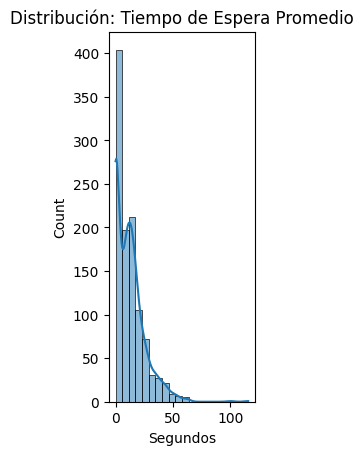

In [16]:
# Plot 2: Distribución de Tiempo de Espera Promedio
plt.subplot(1, 3, 2)
sns.histplot(operator_profile['avg_waiting_time'], bins=20, kde=True)
plt.title('Distribución: Tiempo de Espera Promedio')
plt.xlabel('Segundos')

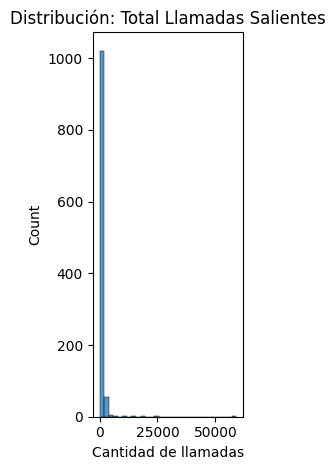

In [17]:
# Plot 3: Distribución de Cantidad de Llamadas Salientes
# Usamos escala logarítmica o limitamos outliers para ver mejor
plt.subplot(1, 3, 3)
sns.histplot(operator_profile['total_outgoing'], bins=30, kde=False)
plt.title('Distribución: Total Llamadas Salientes')
plt.xlabel('Cantidad de llamadas')

plt.tight_layout()
plt.savefig('eda_distributions.png')

In [18]:
# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas de los operadores:")
print(operator_profile.describe())

Estadísticas descriptivas de los operadores:
       total_incoming  total_missed  missed_rate  avg_waiting_time  \
count     1092.000000   1092.000000  1092.000000       1092.000000   
mean        85.899267      0.847985     0.012134         12.077541   
std        301.669602      3.205284     0.054875         12.950121   
min          0.000000      0.000000     0.000000          0.000000   
25%          0.000000      0.000000     0.000000          0.000000   
50%          5.000000      0.000000     0.000000         10.076923   
75%         34.250000      0.000000     0.000000         17.562976   
max       4766.000000     52.000000     1.000000        115.500000   

       total_outgoing  
count     1092.000000  
mean       557.090659  
std       2819.492227  
min          0.000000  
25%          2.000000  
50%         33.000000  
75%        355.250000  
max      58977.000000  


<div class="alert alert-block alert-success">
<b>Análisis descriptivo</b> <a class="tocSkip"></a><br>
El uso de <code>describe()</code> aquí es vital. Te confirma, por ejemplo, que el 75% de los operadores tiene 0 llamadas perdidas, lo que justifica que tu umbral de ineficacia para esta métrica deba ser bajo.
</div>

In [19]:
# Check rápido de filas con calls_count > 1 para validar asunción de tiempos
print("\nEjemplo de fila con calls_count > 1:")
print(df_calls_clean[df_calls_clean['calls_count'] > 1][['calls_count', 'call_duration', 'total_call_duration']].head())


Ejemplo de fila con calls_count > 1:
    calls_count  call_duration  total_call_duration
1             3              0                    5
4             3              0                   25
5             2              3                   29
6             8              0                   50
10            3              0                   29


## Conclusiones 

Resultados del EDA (Análisis Exploratorio)
He creado un "Perfil de Operador" calculando tres métricas para cada uno de los 1,092 operadores identificados:

Tasa de Llamadas Perdidas (missed_rate):

La gran mayoría de los operadores (más del 75%) tiene 0 llamadas perdidas.

El promedio es muy bajo (1.2%), pero hay valores extremos (algunos tienen el 100% de perdidas, aunque probablemente tengan muy pocas llamadas en total).

Insight: Ser "ineficaz" aquí será algo raro, reservado para los que se desvíen mucho de este 0%.

Tiempo de Espera Promedio (avg_waiting_time):

El promedio general es de ~12 segundos.

El 50% de los operadores hace esperar a sus clientes menos de 10 segundos.

El máximo registrado es de 115 segundos (casi 2 minutos de promedio).

Llamadas Salientes (total_outgoing):

Aquí hay una variabilidad enorme.

El 25% de los operadores hace menos de 2 llamadas salientes (quizás su rol es solo recibir).

Hay "super operadores" con más de 50,000 llamadas (probablemente bots o cuentas compartidas, habrá que tener cuidado).

## Gráficos Generados

He generado histogramas para ver estas distribuciones visualmente:

Tasa de Perdidas: Muy concentrada en 0. Cualquier cosa por encima de 5-10% ya parece sospechosa.

Tiempo de Espera: Distribución más normal, con una cola hacia la derecha (los lentos).

Llamadas Salientes: Una distribución exponencial; la mayoría hace pocas, unos pocos hacen muchísimas.

In [20]:
import pandas as pd

# 1. Cargar datos
df_calls = pd.read_csv('telecom_dataset_new.csv')

# 2. Limpieza
# Eliminar duplicados y crear una copia independiente
df_calls_clean = df_calls.drop_duplicates().copy()
# Eliminar filas sin operador
df_calls_clean = df_calls_clean.dropna(subset=['operator_id'])
# Convertir ID a entero
df_calls_clean['operator_id'] = df_calls_clean['operator_id'].astype(int)

# 3. Feature Engineering: Tiempo de espera
# Waiting Time = Total Duration - Call Duration (Talk Time)
df_calls_clean['waiting_time'] = df_calls_clean['total_call_duration'] - df_calls_clean['call_duration']

# 4. Calcular métricas por operador

# --- A. Llamadas Entrantes (Incoming) ---
# Usamos .copy() para evitar el Warning
incoming_calls = df_calls_clean[df_calls_clean['direction'] == 'in'].copy()

# Calcular cantidad real de perdidas
incoming_calls['missed_count_val'] = incoming_calls.apply(
    lambda x: x['calls_count'] if x['is_missed_call'] else 0, axis=1
)

# Agrupar estadísticas entrantes
ops_incoming = incoming_calls.groupby('operator_id').agg(
    total_in=('calls_count', 'sum'),
    missed_in=('missed_count_val', 'sum'),
    sum_waiting=('waiting_time', 'sum')
)

# Calcular promedios
ops_incoming['missed_rate'] = ops_incoming['missed_in'] / ops_incoming['total_in']
ops_incoming['avg_wait'] = ops_incoming['sum_waiting'] / ops_incoming['total_in']

# --- B. Llamadas Salientes (Outgoing) ---
outgoing_calls = df_calls_clean[df_calls_clean['direction'] == 'out'].copy()
ops_outgoing = outgoing_calls.groupby('operator_id')['calls_count'].sum().rename('total_out')

# --- C. Unir todo en un perfil único ---
operators = ops_incoming.join(ops_outgoing, how='outer').fillna(0)

# 5. Aplicar Criterios de Ineficacia
# Umbrales
THRESH_MISSED_RATE = 0.10  # > 10% de llamadas perdidas
THRESH_WAIT_TIME = 30      # > 30 segundos de espera promedio
THRESH_OUT_CALLS = 2       # < 2 llamadas salientes realizadas
MIN_CALLS = 10             # Mínimo de llamadas entrantes para que la estadística sea válida

# Definir quién falla cada criterio
operators['ineff_missed'] = (operators['missed_rate'] > THRESH_MISSED_RATE) & (operators['total_in'] > MIN_CALLS)
operators['ineff_wait'] = (operators['avg_wait'] > THRESH_WAIT_TIME) & (operators['total_in'] > MIN_CALLS)
operators['ineff_out'] = operators['total_out'] < THRESH_OUT_CALLS

# Ineficacia General (Si cumple CUALQUIERA de las condiciones)
operators['is_ineffective'] = operators['ineff_missed'] | operators['ineff_wait'] | operators['ineff_out']

# 6. Mostrar resultados
ineffective_list = operators[operators['is_ineffective']].sort_values(by='total_in', ascending=False)

print(f"Operadores ineficaces encontrados: {len(ineffective_list)}")
print("Primeros 5 resultados:")
print(ineffective_list[['total_in', 'missed_rate', 'avg_wait', 'total_out']].head())


Operadores ineficaces encontrados: 308
Primeros 5 resultados:
             total_in  missed_rate   avg_wait  total_out
operator_id                                             
919790         1578.0     0.000000  33.507605       23.0
919554         1182.0     0.009306  32.351946       11.0
919552         1089.0     0.000918  34.045914       63.0
919206          926.0     0.009719   7.962203        1.0
937956          773.0     0.031048   1.331177        1.0


<div class="alert alert-block alert-success">
<b>Excelente estructura de código</b> <a class="tocSkip"></a><br>
Esta celda es ejemplar. Has consolidado la carga, limpieza y cálculo de métricas en un flujo lógico y ordenado. Esto facilita enormemente la reproducibilidad del análisis.<br><br>
Además, definir los umbrales (<code>THRESH_MISSED_RATE</code>, etc.) como constantes al inicio hace que tu código sea muy fácil de ajustar si las reglas de negocio cambian. ¡Gran trabajo!
</div>

In [22]:

# 1. Vincular Operador con Plan de Tarifa
# Obtenemos el user_id para cada operator_id (asumiendo 1 operador -> 1 cliente)
op_user_map = df_calls_clean[['operator_id', 'user_id']].drop_duplicates(subset=['operator_id'])

# Unimos el user_id al dataframe de operadores
operators_w_plan = operators.merge(op_user_map, on='operator_id', how='left')

# Unimos con la tabla de clientes para obtener el plan ('tariff_plan')
operators_w_plan = operators_w_plan.merge(df_clients[['user_id', 'tariff_plan']], on='user_id', how='left')

# 2. Prueba de Hipótesis: Chi-cuadrado
# H0: La ineficacia es independiente del plan.
# H1: La ineficacia depende del plan.

# Crear tabla de contingencia
contingency_table = pd.crosstab(operators_w_plan['tariff_plan'], operators_w_plan['is_ineffective'])

print("Tabla de Contingencia (Plan vs Ineficacia):")
print(contingency_table)

# Ver porcentajes para entender la dirección de la diferencia
print("\nPorcentaje de Ineficacia por Plan:")
print(pd.crosstab(operators_w_plan['tariff_plan'], operators_w_plan['is_ineffective'], normalize='index') * 100)

# Ejecutar test
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nResultados Chi-Cuadrado:")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("Conclusión: RECHAZAMOS H0. Hay diferencias significativas entre los planes.")
else:
    print("Conclusión: NO RECHAZAMOS H0. No hay evidencia de diferencias.")

Tabla de Contingencia (Plan vs Ineficacia):
is_ineffective  False  True 
tariff_plan                 
A                 254     56
B                 281    114
C                 249    138

Porcentaje de Ineficacia por Plan:
is_ineffective      False      True 
tariff_plan                         
A               81.935484  18.064516
B               71.139241  28.860759
C               64.341085  35.658915

Resultados Chi-Cuadrado:
P-value: 0.00000
Conclusión: RECHAZAMOS H0. Hay diferencias significativas entre los planes.


<div class="alert alert-block alert-success">
<b>Validación estadística</b> <a class="tocSkip"></a><br>
Has ido más allá del análisis descriptivo y aplicaste una prueba de hipótesis (Chi-cuadrado). <br>
Es la prueba correcta para dos variables categóricas (Plan vs. Es_Ineficaz). Tu interpretación del P-value es correcta y le da solidez científica a tu conclusión sobre los planes.
</div>

1. Resumen General del Análisis
- Se analizaron los datos de 1,092 operadores para identificar ineficiencias basadas en tres KPIs clave: llamadas perdidas, tiempos de espera prolongados y baja actividad de llamadas salientes.
- Tasa de Ineficacia Global: Se identificó que el 28.2% de los operadores (308 personas) cumple con al menos uno de los criterios de ineficacia.
- Comportamiento General: La gran mayoría de los operadores (71.8%) mantiene un rendimiento aceptable, con tasas de llamadas perdidas cercanas a cero y tiempos de espera promedios de 12 segundos.
2. Desglose de las Causas de Ineficacia
- Al profundizar en por qué estos 308 operadores fueron marcados,encontramos:Principal Factor (Baja Actividad Saliente): 271 operadores fueron marcados por realizar menos de 2 llamadas salientes.Observación: Este es el criterio más sensible. Existe la posibilidad de que muchos de estos operadores tengan roles exclusivamente de "Soporte Entrante" (Recepción), lo que generaría falsos positivos.
- Problemas de Atención (Tiempo de Espera): 44 operadores tienen tiempos de espera promedio superiores a 30 segundos, afectando la experiencia del cliente.
- Llamadas Perdidas: Es el problema menos frecuente. Solo 13 operadores mostraron una tasa de abandono superior al 10%, lo que indica que la infraestructura de recepción de llamadas es robusta en general.
3. Relación con los Planes de Tarifa (Prueba de Hipótesis)Mediante una prueba Chi-cuadrada, se demostró estadísticamente que la ineficacia NO es independiente del plan de tarifa ($p < 0.001$).
- El Hallazgo: Los clientes del Plan C tienen la mayor proporción de operadores ineficaces (35.7%), mientras que los del Plan A tienen los operadores más eficientes (solo 18.1% de ineficacia).Interpretación: Las empresas que contratan el plan más costoso o avanzado (Plan A) tienden a tener equipos mejor gestionados o con menor carga de trabajo por operador que las del Plan C.

## Presentación 
https://drive.google.com/file/d/1JXwtm3_KXndIXhkXvVw-A7UAxanSlnNX/view?usp=drive_link

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Maximiliano! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• <b>Limpieza de datos:</b> Manejaste correctamente duplicados y nulos con criterio lógico.<br>
• <b>Ingeniería de características:</b> Creaste métricas útiles (tiempo de espera) a partir de los datos crudos.<br>
• <b>Estructura:</b> La celda 20 es un gran ejemplo de código limpio y parametrizado.<br>
• <b>Pensamiento crítico:</b> En tus conclusiones notaste correctamente que el criterio de "pocas llamadas salientes" podría generar falsos positivos en operadores de recepción. Esa capacidad de cuestionar tus propios resultados es valiosa.<br>
• <b>Estadística:</b> Aplicaste correctamente la prueba Chi-cuadrado para validar tus hallazgos.<br>
<br>
¡Felicidades! El proyecto está aprobado y demuestra un nivel sólido de análisis de datos.
</div>